## Laptops Retail Sales Exploratory Analysis

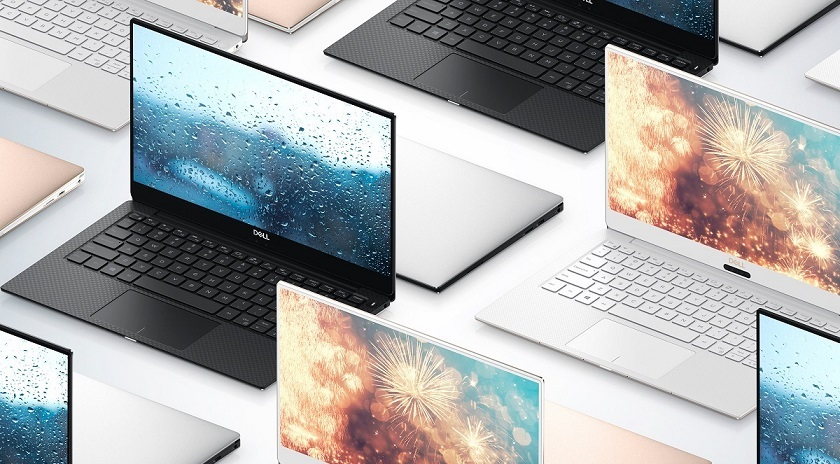

### Introduction

Dataset address: https://www.kaggle.com/datasets/ooi0312/laptop-sales-per-day

This data is collected on sales of laptops from unknown retail store. Contains detailed laptop prices for each company and total daily sales:

* Company - Laptop Manufacturer
* Product - Brand and Model
* Type_name - Type (Notebook, Ultrabook, Gaming, etc.)
* Inches - Screen Size
* Screen_resolution - Screen Resolution
* CPU - Central Processing Unit (CPU)
* RAM - Laptop Random Access Memory (GB)
* Memory - Hard Disk / SSD Memory
* GPU - Graphics Processing Units (GPU)
* Operation_sys - Operating System
* Weight - Laptop Weight
* Price - Price (in Euros)
* Total_sales_per_day - Total Sales (in Euros)

### Importing required packages

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set_palette("pastel")

### Loading data into DataFrame

In [2]:
df = pd.read_excel("Laptop Sales Per Day.xlsx", sheet_name="laptop_price and sales", index_col=False)

In [3]:
df_copy = df.copy()

In [4]:
df.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight,Price_euros,Total Sales per Day (euros)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2679.38
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1150.00


In [5]:
df.tail(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight,Price_euros,Total Sales per Day (euros)
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.0,458.0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,764.0
1302,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,369.0,369.0


In [6]:
df.columns = ['Company', 'Product', 'Type_name', 'Inches', 'Screen_resolution', 'CPU', 'RAM', 'Memory', 'GPU', 'Operation_sys', 'Weight', 'Price', 'Total_sales_per_day']

    Streamlined the syntax of the column titles.

In [7]:
print(df.shape)

(1303, 13)


    Total record in the dataset = 1303
    Columns in the dataset = 13

## Data Pre-processing

In [8]:
df.isna().sum()

Company                0
Product                0
Type_name              0
Inches                 0
Screen_resolution      0
CPU                    0
RAM                    0
Memory                 0
GPU                    0
Operation_sys          0
Weight                 0
Price                  0
Total_sales_per_day    0
dtype: int64

    Checking for null values.

In [9]:
df.duplicated().sum()

8

In [10]:
df.drop_duplicates(inplace=True)

    8 duplicated rows found and removed successfully.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1295.0,15.022780,1.422924,10.10,14.000,15.60,15.600,18.4
RAM,1295.0,8.401544,5.081651,2.00,4.000,8.00,8.000,64.0
Weight,1295.0,2.040409,0.666058,0.69,1.500,2.04,2.305,4.7
Price,1295.0,1127.417112,698.793099,174.00,600.950,979.00,1489.495,6099.0
Total_sales_per_day,1295.0,2440.779266,1957.950200,224.00,1143.625,1910.00,3158.000,19875.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1295 non-null   object 
 1   Product              1295 non-null   object 
 2   Type_name            1295 non-null   object 
 3   Inches               1295 non-null   float64
 4   Screen_resolution    1295 non-null   object 
 5   CPU                  1295 non-null   object 
 6   RAM                  1295 non-null   int64  
 7   Memory               1295 non-null   object 
 8   GPU                  1295 non-null   object 
 9   Operation_sys        1295 non-null   object 
 10  Weight               1295 non-null   float64
 11  Price                1295 non-null   float64
 12  Total_sales_per_day  1295 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 141.6+ KB


In [13]:
tmp_features = ['Company', 'Product', 'Type_name', 'Screen_resolution', 'CPU', 'Memory', 'GPU', 'Operation_sys']
for f in tmp_features:
    df[f] = df[f].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company              1295 non-null   category
 1   Product              1295 non-null   category
 2   Type_name            1295 non-null   category
 3   Inches               1295 non-null   float64 
 4   Screen_resolution    1295 non-null   category
 5   CPU                  1295 non-null   category
 6   RAM                  1295 non-null   int64   
 7   Memory               1295 non-null   category
 8   GPU                  1295 non-null   category
 9   Operation_sys        1295 non-null   category
 10  Weight               1295 non-null   float64 
 11  Price                1295 non-null   float64 
 12  Total_sales_per_day  1295 non-null   float64 
dtypes: category(8), float64(4), int64(1)
memory usage: 107.0 KB


    Changed 'object' type to 'category', it improves memory usage speed.

In [14]:
features = df.columns.values
for f in features :
    print(f,': ', df[f].unique())
    print()

Company :  ['Apple', 'HP', 'Acer', 'Asus', 'Dell', ..., 'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']
Length: 19
Categories (19, object): ['Acer', 'Apple', 'Asus', 'Chuwi', ..., 'Samsung', 'Toshiba', 'Vero', 'Xiaomi']

Product :  ['MacBook Pro', 'Macbook Air', '250 G6', ' ', 'Aspire 3', ..., 'Stream 11-Y000na', 'X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce', 'Yoga 500-14ISK', '15-AC110nv (i7-6500U/6GB/1TB/Radeon', 'X553SA-XX031T (N3050/4GB/500GB/W10)']
Length: 618
Categories (618, object): [False, ' ', '110-15ACL (A6-7310/4GB/500GB/W10)', '14-am079na (N3710/8GB/2TB/W10)', ..., 'Zenbook UX390UA', 'Zenbook UX410UA-GV027T', 'Zenbook UX430UA', 'Zenbook UX510UW-FI095T']

Type_name :  ['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible', 'Workstation']
Categories (6, object): ['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation']

Inches :  [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]

Screen_resolut

* There are 19 different manufacturers in this dataset.
* 618 different products.
* 6 type of laptops: Ultrabook, Notebook, Netbook, Workstation, etc.
* Screen size ranges from 10.1 to 17.3.
* 40 different screen resolutions.
* 118 CPU's.
* RAM size ranges from 2GB to 64GB.
* 110 GPU types.
* 9 different operating systems such as: MS Windows, MacOS, Linux, Android, etc.
* Price ranges from €174.0 to €6099.0

### Univariate Analysis

**Categorical features**

In [15]:
features

array(['Company', 'Product', 'Type_name', 'Inches', 'Screen_resolution',
       'CPU', 'RAM', 'Memory', 'GPU', 'Operation_sys', 'Weight', 'Price',
       'Total_sales_per_day'], dtype=object)

**Company**

In [16]:
pd.DataFrame(df.Company.value_counts(ascending=False))

,Company
Lenovo,295
Dell,294
HP,272
Asus,157
Acer,103
MSI,54
Toshiba,48
Apple,21
Samsung,9
Razer,7


    List of manufacturers and the number of laptops sold by them.

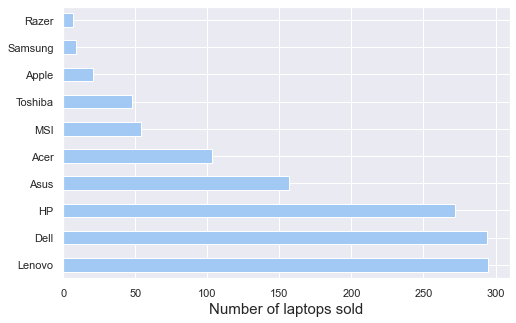

In [17]:
df.Company.value_counts(ascending=False).nlargest(10).plot(kind='barh', figsize=(8,5))
plt.xlabel("Number of laptops sold", fontsize=15);

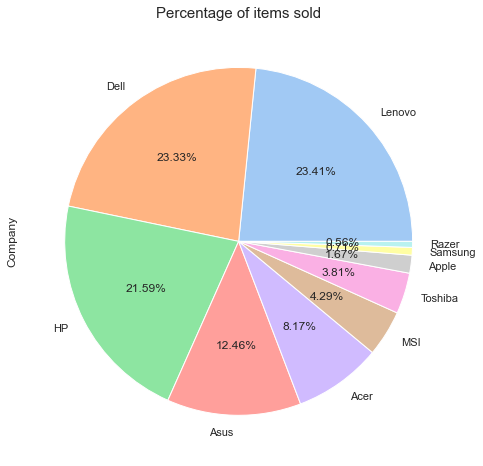

In [18]:
df.Company.value_counts().nlargest(10).plot(kind='pie', autopct='%1.2f%%', figsize=(8,8))
plt.title("Percentage of items sold", fontsize=15);

    Lenovo, Dell and HP are leaders in the number of laptops sold.

**Product**

In [19]:
pd.DataFrame(df.Product.value_counts().nlargest(10))

,Product
XPS 13,30
Inspiron 3567,27
250 G6,21
Vostro 3568,19
Legion Y520-15IKBN,19
Inspiron 5570,18
ProBook 450,18
Alienware 17,15
Inspiron 5567,14
Satellite Pro,13


    The laptop XPS 13 manufactured by Dell was sold the most.

**Type Name**

In [20]:
pd.DataFrame(df.Type_name.value_counts())

,Type_name
Notebook,722
Gaming,205
Ultrabook,196
2 in 1 Convertible,120
Workstation,29
Netbook,23


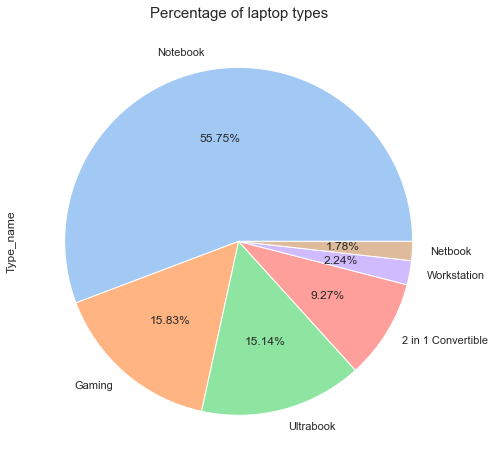

In [21]:
df.Type_name.value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(8,8))
plt.title("Percentage of laptop types", fontsize=15);

    Notebooks are the most sold laptop-type - 56% of total sales.

**Screen resolution**

In [22]:
pd.DataFrame(df.Screen_resolution.value_counts().nlargest(10))

,Screen_resolution
Full HD 1920x1080,507
1366x768,274
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160,11


    841 laptops have a resolution of 1920x1080 with different screen options!

**CPU**

In [23]:
pd.DataFrame(df.CPU.value_counts()).nlargest(10, columns='CPU')

,CPU
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,133
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
Intel Core i5 6200U 2.3GHz,68
Intel Core i3 6006U 2GHz,64
Intel Core i7 6500U 2.5GHz,48
Intel Core i7 6700HQ 2.6GHz,43
Intel Core i3 7100U 2.4GHz,36


    Intel Core i5 7200U 2.5GHz is the most popular CPU in the dataset.

**Memory**

In [24]:
pd.DataFrame(df.Memory.value_counts().nlargest(10))

,Memory
256GB SSD,412
1TB HDD,221
500GB HDD,130
512GB SSD,117
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,36
2TB HDD,16
64GB Flash Storage,14


    Laptops with 256GB SSD memory were the most sold.

**GPU**

In [25]:
pd.DataFrame(df.GPU.value_counts().nlargest(10))

,GPU
Intel HD Graphics 620,280
Intel HD Graphics 520,184
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
Nvidia GeForce 940MX,43
AMD Radeon 530,41
Intel HD Graphics 500,39
Intel HD Graphics 400,35
Nvidia GeForce GTX 1070,30


**Operation systems**

In [26]:
pd.DataFrame(df.Operation_sys.value_counts(normalize=True))

,Operation_sys
Windows 10,0.822394
No OS,0.050965
Linux,0.047104
Windows 7,0.034749
Chrome OS,0.020849
macOS,0.010039
Mac OS X,0.006178
Windows 10 S,0.006178
Android,0.001544


    The most popular operating system is MS Windows 10, which accounts for 82% of total sales.

**Numerical features**

In [27]:
def plot_uni(d):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--', linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g', linestyle='solid', linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

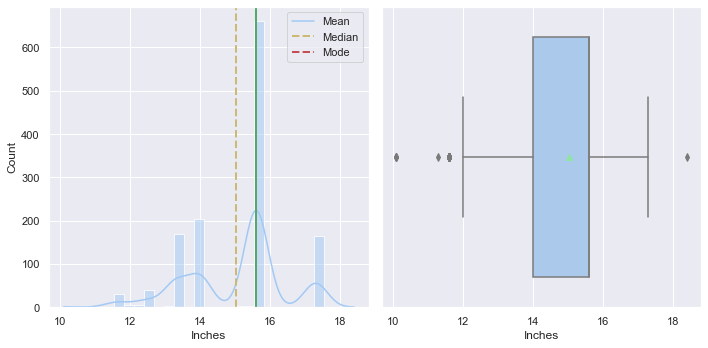

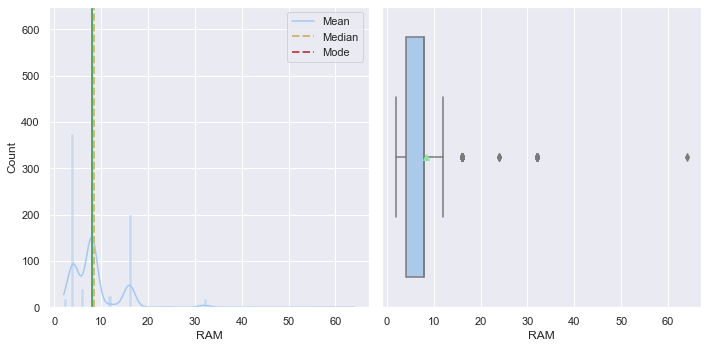

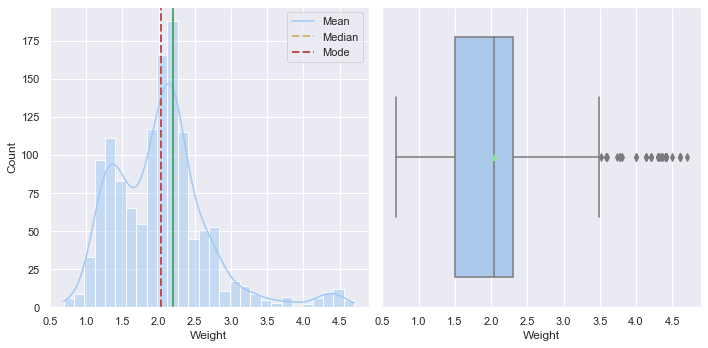

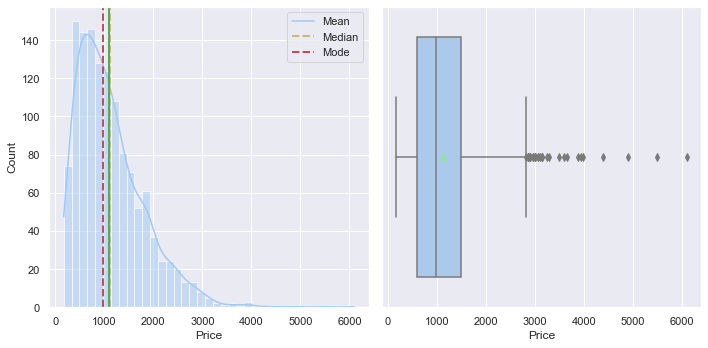

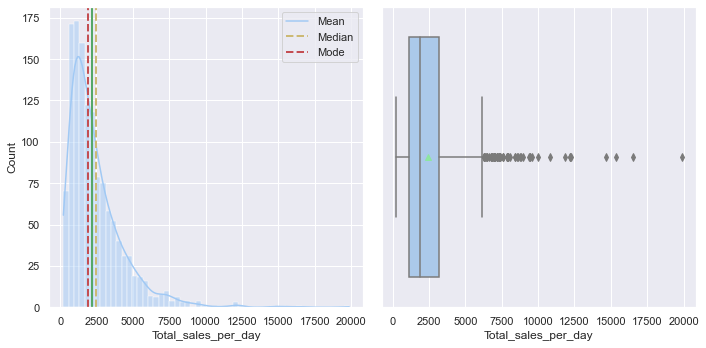

In [28]:
num_cols = df[['Inches', 'RAM', 'Weight', 'Price', 'Total_sales_per_day']]
for f in num_cols:
    plot_uni(df[f])

**Inches**

- 50% of the items sold had a screen size between 14 and 15.6 inches.
- There are several outliers in both directions.

**RAM**

- Average random access memory size is 8,4 GB.
- There are few outliers (higher end).

**Weight**

- Most buyers are used to buying laptops weighing 2.2.
- There are few outliers (higher end).

**Price**

- Price is skewed toward right.
- The price has outliers (higher end) as the maximum price is €6099 and the average price is €1127.42.

**Total sales per day**

- Total sales is skewed toward right.
- Total sales have outliers (higher end).
- The total sales of most products is less than €3160.

### Bivariate analysis

**Products by companies**

In [29]:
pd.DataFrame(df.groupby(['Company','Product'])['Total_sales_per_day'].sum().nlargest(10))

Total_sales_per_day
Company Product                                
Dell    XPS 13                        107751.00
        Alienware 17                  103000.47
Lenovo  ThinkPad X1                    56362.64
Dell    XPS 15                         44149.20
Razer   Blade Pro                      44090.00
Dell    Inspiron 5570                  40819.54
Lenovo  Legion Y520-15IKBN             39991.00
Dell    Latitude 5580                  35044.83
Apple   MacBook Pro                    33794.49
HP      EliteBook 840                  32397.55

    Dell occupies 5 positions in the ranking of the Top-10 bestselling laptops. Dell's total sales are €772,282.77.

In [30]:
pd.DataFrame(df.groupby('Company')['Total_sales_per_day'].sum().sort_values(ascending=False))

,Total_sales_per_day
Company,
Dell,772282.77
Lenovo,719361.44
HP,534379.09
Asus,435775.90
MSI,197603.66
Acer,148426.33
Toshiba,139449.00
Apple,69618.38
Razer,49746.00


In [31]:
print('Total sales: ', df.Total_sales_per_day.sum().round(2))
print('Dell and Lenovo: ', df[df['Company'].isin(['Dell', 'Lenovo'])].Total_sales_per_day.sum())

Total sales:  3160809.15
Dell and Lenovo:  1491644.21


    Almost half of all sales (46.74%) belong only to Dell and Lenovo!

**Average price of products**

In [32]:
pd.DataFrame(df.groupby(['Company', 'Product'])['Price'].mean().nlargest(10))

Price
Company Product                   
HP      Zbook 17            4389.0
Razer   Blade Pro           4119.0
Asus    ROG G701VO          3975.0
        ROG G703VI-E5062T   3890.0
Lenovo  Thinkpad P51s       3299.0
        Thinkpad P51        3146.0
HP      Elitebook Folio     3100.0
Dell    Precision 7520      3055.0
Asus    Rog G701VIK-BA060T  2999.0
Lenovo  Thinkpad P71        2999.0

**Correlation**

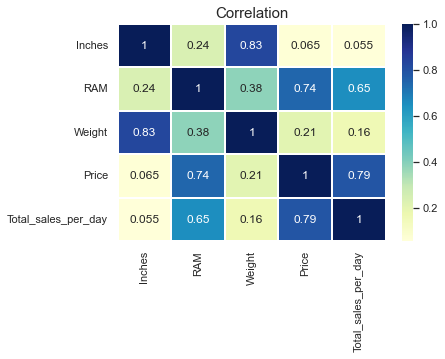

In [33]:
sns.heatmap(data=df.corr(),cmap="YlGnBu", annot=True ,linewidths=0.2, linecolor='white')
sns.set(rc = {'figure.figsize':(8,8)})
plt.title("Correlation", fontsize=15);

- Inches has a strong correlation with Weight and vice versa.
- Price and Total sales are closely related to RAM and vice versa.

### Multivariate Analysis

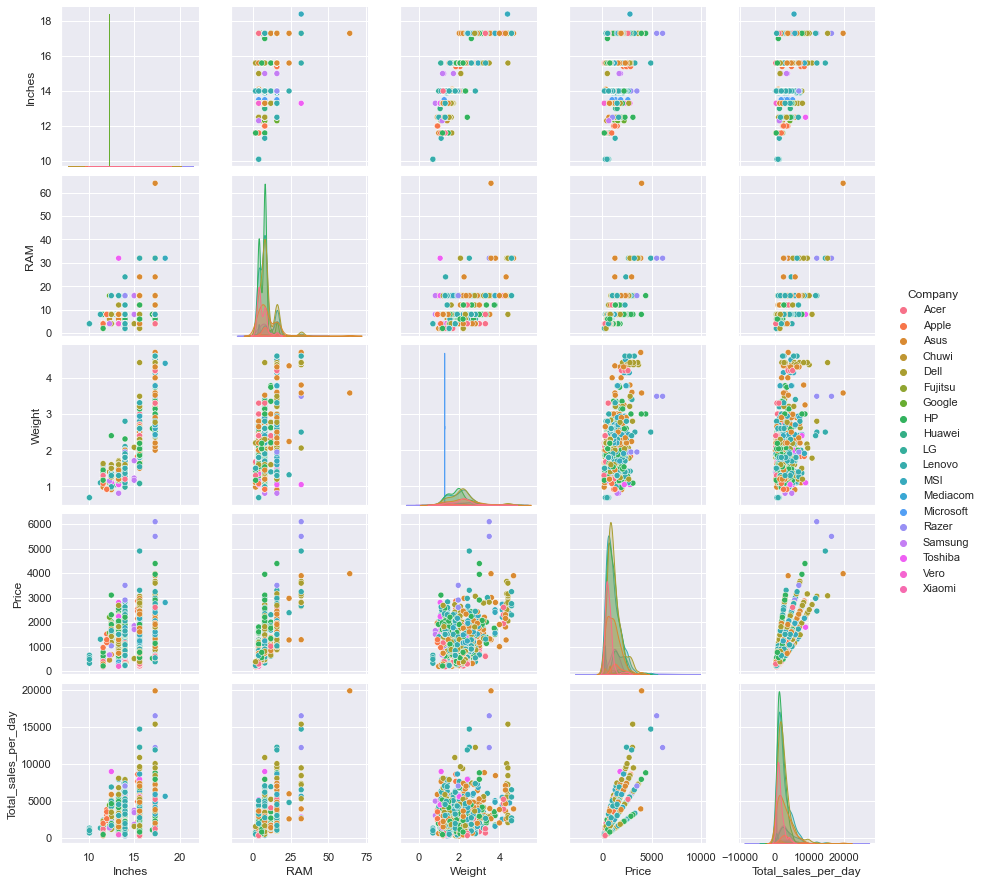

In [34]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.pairplot(df, hue='Company');

- Dell, Lenovo and HP are large companies. 
- However, the most expensive laptops are HP Zbook 17, Razer Blade Pro and Asus ROG G701VO.

## Conclusion

* The total daily sale amount is EUR 3,160,809.15.
* As we mentioned earlier, Dell, Lenovo and HP are the leaders in daily sales. These 3 companies account for 23.33%, 23.41% and 21.59% respectively of the total sales.
* The following products have more sales: Dell XPS 13 - €107,751.00, Dell Alienware 17 - €103,000.47 and Lenovo ThinkPad X1 - €56362.64.
* Microsoft is the undisputed world leader in selling operating systems for personal computers. In our data set, its share is 86.2%.
* A large amount of RAM is not the reason for the increase in sales. In our dataset, laptops with 8 GB and 4 GB of RAM make up 47.72% and 28.88%, respectively.
* Intel is the leader in processors, especially we have many Intel Core i5 and Intel Core i7 processors in our dataset.
* Given that customers were buying laptops with relatively average specifications (memory leader - 256 GB SSD and GPU leader - Intel HD Graphics 620), as well as 15.83% of sales are gaming laptops, I can assume that many laptops were purchased for home use.